In [1]:
######################################################
#
# Importing all required libraries
#
######################################################
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers import Embedding
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN

In [2]:
######################################################
#
# Uploading Data
#
######################################################
train = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
test = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")

In [3]:
##########################################################################################
#
#                               ***Data Description***
#
#
#
### Train Data Size: [2934817 rows x 19 columns]
#
#
### Test Data Size: [733704 rows x 19 columns]
#
# 1. pkSeqID: Row Identifier
# 2. proto: Textual representation of transaction protocols present in network flow          
# 3. saddr: Source IP Address
# 4. sport: Source Port Number
# 5. daddr: Destination IP Address
# 6. dport: Destination Port Number
# 7. seq: Argus sequence number
# 8. stddev: Standard deviation of aggregated records
# 9. N_IN_Conn_P_SrcIP: Number of inbound connections per source IP.
# 10. min: Minimum duration of aggregated records
# 11. state_number: Numerical representation of feature state
# 12. mean: Average duration of aggregated records
# 13. N_IN_Conn_P_DstIP: Number of inbound connections per destination IP.
# 14. srate: Source-to-destination packets per second
# 15. drate: Destination-to-source packets per second
# 16. max: Maximum duration of aggregated records
# 17. attack: Class label 0 for Normal traffic, 1 for Attack Traffic
# 18. category (Target Column): Traffic category
# 19. subcategory: Traffic subcategory
#
############################################################################################

In [4]:
######################################################
#
# Looking for null values in test data
#
######################################################
test.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [5]:
######################################################
#
# Dropping pkSeqID and seq because they're identifying
# rows for which we have ip addresses. Dropping 
# subcategory because we are already dealing with the 
# column 'category'.
#
######################################################
train.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
test.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
train.dtypes[train.dtypes=='object']

proto       object
saddr       object
sport       object
daddr       object
dport       object
category    object
dtype: object

In [6]:
######################################################
#
# Dropping pkSeqID and seq because they're identifying
# rows for which we have ip addresses. Dropping 
# subcategory because we are already dealing with the 
# column 'category'.
#
######################################################
drop_theft = train[train['category']=='Theft'].index
train.drop(drop_theft , inplace=True)

In [7]:
######################################################
#
# Dropping pkSeqID and seq because they're identifying
# rows for which we have ip addresses. Dropping 
# subcategory because we are already dealing with the 
# column 'category'.
#
######################################################
drop_theft = test[test['category']=='Theft'].index
test.drop(drop_theft , inplace=True)

In [8]:
######################################################
#
# Finding the number of the string '0x' in the column
# 'sport'
# 
######################################################
search_string='0x'
result = set([i for i in train['sport'] if i.startswith(search_string)])
result

{'0x0008', '0x000d', '0x0011', '0x0303'}

In [9]:
######################################################
#
# Replacing the string '0x' with relevant numbers from
# the data
# 
######################################################
train['sport']=train['sport'].replace(['0x0303'],'771') 
train['sport']=train['sport'].replace(['0x0011'],'17')
train['sport']=train['sport'].replace(['0x000d'],'13')
train['sport']=train['sport'].replace(['0x0008'],'8')

In [10]:
######################################################
#
# Converting the cell values into integer
# 
######################################################
train["sport"] = train["sport"].astype(str).astype(int)

In [11]:
######################################################
#
# Finding the number of the string '0x' in the column
# 'dport'
# 
######################################################
search_string='0x'
result = set([i for i in train['dport'] if i.startswith(search_string)])
print(len(result))
result

1062


{'0x2923',
 '0xbf4c',
 '0x6068',
 '0x1027',
 '0x3e54',
 '0x1d56',
 '0x7d44',
 '0x6c56',
 '0x4140',
 '0xe603',
 '0x234e',
 '0x0703',
 '0x7108',
 '0x504d',
 '0x1f63',
 '0xb593',
 '0x7663',
 '0xb549',
 '0xfab2',
 '0x02c0',
 '0x4b55',
 '0xe55c',
 '0x7240',
 '0x2338',
 '0x3140',
 '0x22c0',
 '0xda6d',
 '0xe74c',
 '0x2253',
 '0x2c4c',
 '0xac44',
 '0x0db4',
 '0x810d',
 '0x32c0',
 '0x6aa9',
 '0xae4b',
 '0x0f0d',
 '0x8a00',
 '0x1975',
 '0xe14f',
 '0x005a',
 '0x6ec0',
 '0x7e41',
 '0xed48',
 '0x1dc0',
 '0xb545',
 '0x08c0',
 '0xfb48',
 '0x5f4a',
 '0xa876',
 '0xc907',
 '0xf04f',
 '0x4efc',
 '0xba13',
 '0x29f0',
 '0xcc4c',
 '0x5a45',
 '0x0c04',
 '0x2f02',
 '0xad02',
 '0x7217',
 '0x7752',
 '0xec0b',
 '0xe04d',
 '0x1e80',
 '0xbd40',
 '0x3485',
 '0xf401',
 '0x07e5',
 '0x25c0',
 '0x3100',
 '0xd74b',
 '0x3543',
 '0xd28b',
 '0x4460',
 '0x984a',
 '0x1407',
 '0xc654',
 '0xee54',
 '0xac45',
 '0x6179',
 '0xb004',
 '0x346b',
 '0xff78',
 '0x8193',
 '0x9701',
 '0x229b',
 '0x42e3',
 '0x1203',
 '0x34c0',
 '0x2143',

In [12]:
###########################################################
#
# Converting the values consisted with '0x' into integer
# 
###########################################################
train['dport']=train.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [13]:
######################################################
#
# Counting the number of values in 'dport'
# 
######################################################
train['dport'].value_counts()

 80       2858794
 1           5379
 3306        3757
 53           275
-1            163
           ...   
 6263           1
 40023          1
 2165           1
 40022          1
 13117          1
Name: dport, Length: 6778, dtype: int64

In [14]:
######################################################
#
# Replacing the string '0x' in test data with relevant
# values in the column
# 
######################################################
test['sport']=test['sport'].replace(['0x0303'],'771') 
test['sport']=test['sport'].replace(['0x0011'],'17')
test['sport']=test['sport'].replace(['0x000d'],'13')
test['sport']=test['sport'].replace(['0x0008'],'8')

In [15]:
######################################################
#
# Replacing the string '0x' in test data with relevant
# values in the column
# 
######################################################
test["sport"] = test["sport"].astype(str).astype(int)

In [16]:
######################################################
#
# Replacing the string '0x' in test data with relevant
# values in the column
# 
######################################################
test['dport'] = test.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [17]:
######################################################
#
# Performing label encoding in train and test data
# 
######################################################
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["saddr_enc"]= le.fit_transform(train.saddr)
train["daddr_enc"]= le.fit_transform(train.daddr)
train["proto_enc"]= le.fit_transform(train.proto)
train["category_enc"]= le.fit_transform(train.category)
train.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [18]:
######################################################
#
# Performing label encoding in train and test data
# 
######################################################
test["saddr_enc"]= le.fit_transform(test.saddr)
test["daddr_enc"]= le.fit_transform(test.daddr)
test["proto_enc"]= le.fit_transform(test.proto)
test["category_enc"]= le.fit_transform(test.category)
test.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [19]:
######################################################
#
# Assigning target column into y_train and y_test
# 
######################################################
y_train=train["category_enc"]
y_test=test["category_enc"]

In [20]:
######################################################
#
# Standardizing and separting feature columns from 
# train and test data
# 
######################################################
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
train= pd.DataFrame(scaled_features,columns=cols)

features = test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
test= pd.DataFrame(scaled_features,columns=cols)

In [21]:
pd.Series(y_test).value_counts()

0    385309
1    330112
3     18163
2       107
Name: category_enc, dtype: int64

In [22]:
pd.Series(y_train).value_counts()

0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

In [23]:
######################################################
#
# Balancing the dataset by over and under sampling
# 
######################################################
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.svm import SVC
import imblearn
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0 : 1541315, 1 : 1320148, 2 : 72919, 3 : 72919}
random_over= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_over.fit_resample(train,y_train)

from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 72919, 1 : 72919, 2 : 72919, 3 : 72919}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
Xres1,yres1 = random_under.fit_resample(Xres,yres)

In [24]:
pd.Series(yres1).value_counts()

0    72919
1    72919
2    72919
3    72919
Name: category_enc, dtype: int64

In [25]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 385309, 1 : 330112, 2 : 330112, 3 : 330112}
random_over_1= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
test,y_test = random_over_1.fit_resample(test,y_test)

In [26]:
pd.Series(y_test).value_counts()

0    385309
1    330112
2    330112
3    330112
Name: category_enc, dtype: int64

In [27]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 14584, 1 : 14584, 2 : 14584, 3 : 14584}
random_over_2= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
test,y_test = random_over_2.fit_resample(test,y_test)

In [28]:
pd.Series(y_test).value_counts()

0    14584
1    14584
2    14584
3    14584
Name: category_enc, dtype: int64

In [29]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

callback=myCallback()

In [30]:
######################################################
#
# Initializing the optimizer instead of 'Adam'to 
# define the learning rate
# 
######################################################
from tensorflow.keras import optimizers
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [31]:
Xres1.shape

(291676, 15)

In [32]:
######################################################
#
# Designing the Simple RNN model with four dense layer
# 
######################################################
n_samples, n_feats = Xres1.shape[0], Xres1.shape[1]
Xres1=np.array(Xres1)
Xres1 = Xres1.reshape((n_samples, n_feats, 1))
yres1=np.array(yres1)
yres1 = to_categorical(yres1, 4)
model = Sequential()
model.add(LSTM(n_feats, input_shape=(n_feats, 1)))
model.add(Dense(20))
model.add(Dense(60))
model.add(Dense(80))
model.add(Dense(90))
model.add(Dense(4, activation='softmax'))

In [33]:
######################################################
#
# Compiling the model
# 
######################################################
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [34]:
######################################################
#
# Preparing the validation data
# 
######################################################
n_samples, n_feats = test.shape[0], test.shape[1]
test=np.array(test)
test = test.reshape((n_samples, n_feats, 1))
y_test=np.array(y_test)
y_test = to_categorical(y_test, 4)

In [35]:
######################################################
#
# Model overview
# 
######################################################
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15)                1020      
                                                                 
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 60)                1260      
                                                                 
 dense_2 (Dense)             (None, 80)                4880      
                                                                 
 dense_3 (Dense)             (None, 90)                7290      
                                                                 
 dense_4 (Dense)             (None, 4)                 364       
                                                                 
Total params: 15,134
Trainable params: 15,134
Non-traina

In [36]:
######################################################
#
# Training the model
# 
######################################################
history = model.fit(Xres1, yres1,batch_size=256,
                                    epochs=1000,
                                    validation_data=(test, y_test),callbacks =[callback],
                                    workers=4)

Epoch 1/1000
1140/1140 [==============================] - 16s 11ms/step - loss: 0.5419 - accuracy: 0.7640 - val_loss: 0.3172 - val_accuracy: 0.8500
Epoch 2/1000
1140/1140 [==============================] - 11s 10ms/step - loss: 0.2917 - accuracy: 0.8739 - val_loss: 0.2660 - val_accuracy: 0.8796
Epoch 3/1000
1140/1140 [==============================] - 11s 9ms/step - loss: 0.2566 - accuracy: 0.8927 - val_loss: 0.2352 - val_accuracy: 0.9009
Epoch 4/1000
1140/1140 [==============================] - 11s 9ms/step - loss: 0.2290 - accuracy: 0.9055 - val_loss: 0.2110 - val_accuracy: 0.9094
Epoch 5/1000
1140/1140 [==============================] - 11s 9ms/step - loss: 0.2042 - accuracy: 0.9158 - val_loss: 0.1901 - val_accuracy: 0.9204
Epoch 6/1000
1140/1140 [==============================] - 11s 10ms/step - loss: 0.1838 - accuracy: 0.9256 - val_loss: 0.1841 - val_accuracy: 0.9218
Epoch 7/1000
1140/1140 [==============================] - 11s 10ms/step - loss: 0.1695 - accuracy: 0.9313 - val_los

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


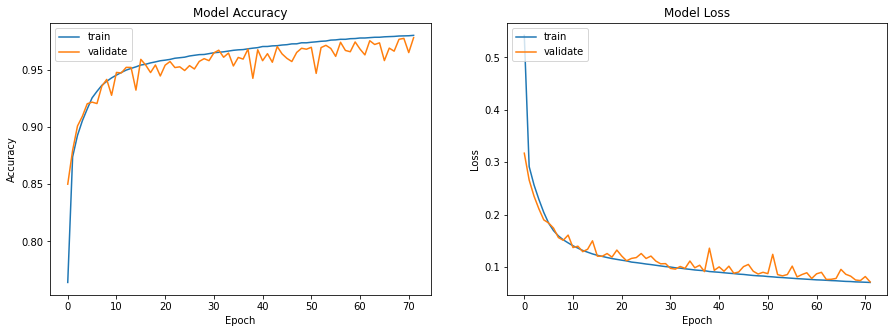

<Figure size 432x288 with 0 Axes>

In [38]:
######################################################
#
# Plotting model accuracy, validation accuracy and
# model loss
# 
######################################################
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
 

# list all data in history
print(history.history.keys())

plotmodelhistory(history)
plt.savefig('Mode Accuracy and Loss',dpi=300)

In [39]:
######################################################
#
# Test accuray of the model
# 
######################################################
scores = model.evaluate(test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1823/1823 [==============================] - 9s 4ms/step - loss: 0.0717 - accuracy: 0.9782
Test loss: 0.07170993834733963
Test accuracy: 0.9782466888427734


In [40]:
######################################################
#
# Defining function for plotting the confusion matrix
# 
######################################################
pred = model.predict(test)

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

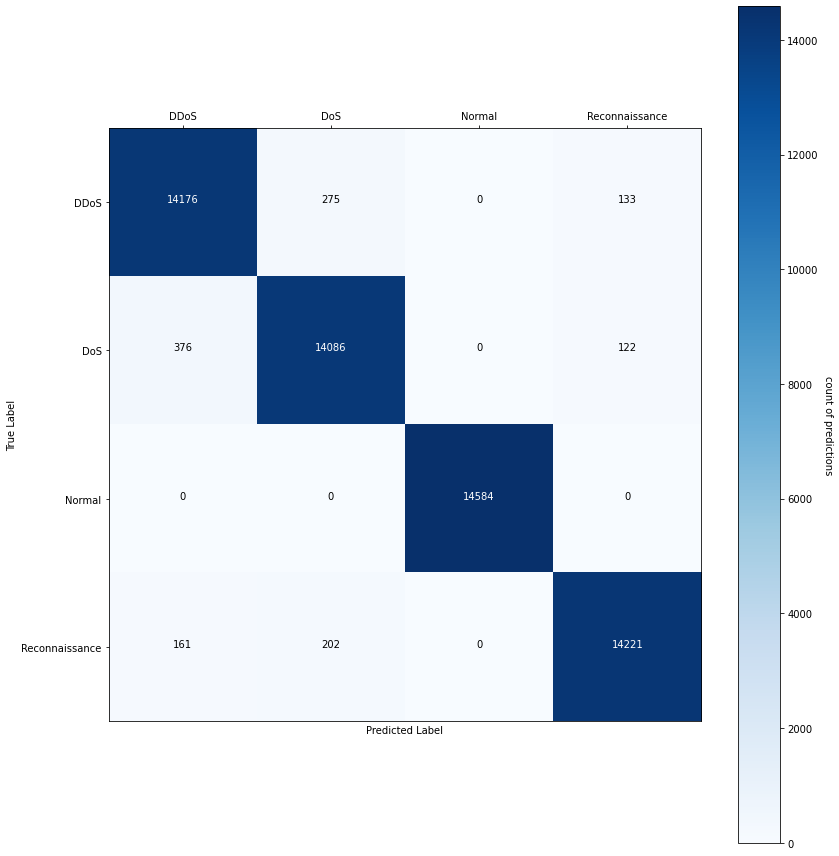

In [53]:
######################################################
#
# Plotting the confusion matrix
# 
######################################################
labels = ['DDoS', 'DoS', 'Normal', 'Reconnaissance']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.savefig("sample.jpg",dpi=300)
plt.show()


In [42]:
######################################################
#
# Finding the classification report
# 
######################################################
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_true, Y_pred_classes,target_names=labels))

                precision    recall  f1-score   support

          DDoS       0.96      0.97      0.97     14584
           DoS       0.97      0.97      0.97     14584
        Normal       1.00      1.00      1.00     14584
Reconnaissance       0.98      0.98      0.98     14584

      accuracy                           0.98     58336
     macro avg       0.98      0.98      0.98     58336
  weighted avg       0.98      0.98      0.98     58336



In [43]:
#############################################################
#
# Finding the class with the largest predicted probability
# 
#############################################################
ypred = model.predict(Xres1)
ypred = ypred.argmax(axis=-1)
yres1 = yres1.argmax(axis=-1)

ROC AUC score: 0.9888232147999836


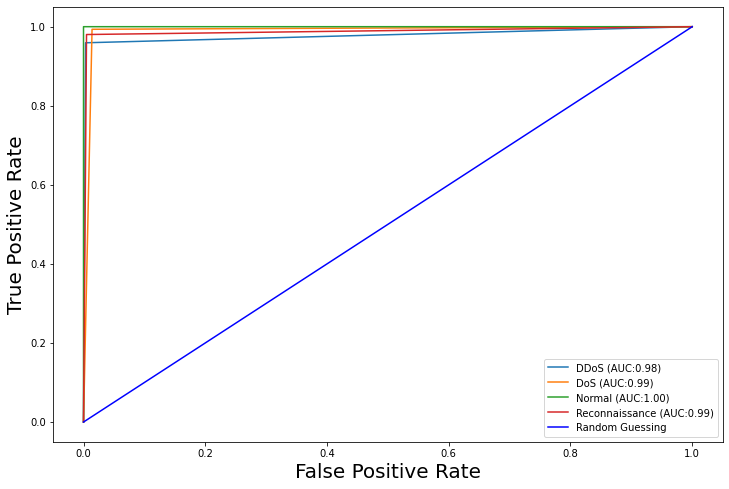

In [55]:
#############################################################
#
# Function for plotting the ROC curve
# 
#############################################################

import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target = ['DDoS', 'DoS', 'Normal', 'Reconnaissance']


fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(ypred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(yres1, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate', fontsize=25)
c_ax.set_ylabel('True Positive Rate',fontsize=25)
plt.savefig('ROC_LSTM',dpi=300)
plt.show()
